### Academic Writing Task
#### Martyna Iwaniec I MA PJN
### Finding most frequent words in *Anne of Green Gables* by L. M. Montgomery




### Table of contents

#### 1. Introduction

#### 2. Data collection

#### 3. Extracting the text

#### 4. Editing the text

#### 5. Removing stop words

#### 6. Results

### 1. Introduction
<img style="float: right ; margin: 5px 20px 5px 10px; width: 50%" src="https://upload.wikimedia.org/wikipedia/commons/8/8b/Montgomery_Anne_of_Green_Gables.jpg">

This project aims to find out what are the most frequent words in Lucy Maud Montgomery's *Anne of Green Gables*.

First of all, the novel *Anne of Green Gables* will be scraped from the website [Project Gutenberg](https://www.gutenberg.org/) (which contains a large corpus of books) using the package `requests`.

Then, the words will be extracted from this web data using the Python library `BeautifulSoup`.

After that, an analysis of the distribution of words will be made with the use of the *Natural Language ToolKit* - `nltk`.

Finally, `matplotlib` library will be used to create a static visualisation of the results.


To start with, the main python packages that will be used must be loaded.

In [11]:
import requests
from bs4 import BeautifulSoup
import nltk
import matplotlib as plt
#magic function that displays figures inline
%matplotlib inline

## 2. Data collection

To analyse the language, the contents of the book must be downloaded. 
Fortunately, the full book is available online at Project Gutenberg as an HTML file for free: [Project Gutenberg website](https://www.gutenberg.org/files/45/45-h/45-h.htm).

Usually, a file is downloaded by an user when visiting a webpage. However, in this notebook the HTML file will be requested directly into Python. To do this, a `get` request will be made with the **requests** package.

In [12]:
#get the HTML file 
r = requests.get('https://www.gutenberg.org/files/45/45-h/45-h.htm')

#set the correct text encoding of the HTML page
r.encoding = 'utf-8'

#extract the HTML from the request object
html = r.text

#print the first 1000 characters in html to see how the file looks
print(html[:1000])

﻿<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      Anne of Green Gables, by Lucy Maud Montgomery
    </title>
    <style type="text/css" xml:space="preserve">

    body { margin:5%; background:#faebd0; text-align:justify}
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 5%; margin-right: 5%; text-align: justify; font-size: 80%; font-style: italic;}
    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10


### 3. Extracting the text

Next, to extract the text of the novel, the package `BeautifulSoup` will be used.

In web development, the term *tag soup* refers to structurally or syntactically incorrect HTML code written for a webpage. *Beautiful Soup* was created to make *tag soup* beautiful again as well as extract information from it. 

After creating the soup, its `.get_text()` method can be used to extract the text.

In [3]:
#create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')

#get the text out of the soup
text = soup.get_text()

#print a sample of the text (between characters 0 and 1000)
print(text[0:1000])

﻿




      Anne of Green Gables, by Lucy Maud Montgomery
    


    body { margin:5%; background:#faebd0; text-align:justify}
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 5%; margin-right: 5%; text-align: justify; font-size: 80%; font-style: italic;}
    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
    .toc2      { margin-left: 20%;}
    .xx-small {font-size: 60%;}
    .x-small {font-size: 75%;}
    .small {font-size: 85%;}
    .large {font-size: 115%;}
    .x-large {font-size: 130%;}
    .indent5   { margin-left: 5%;}
    .indent10  { margin-left: 10%;


### 4. Editing the text

The text of the novel is now extracted, however it must still be cleaned-up.

In particular, at the end and at the start of the novel, there are some unwanted elements not relevant to the language of the book. They could be either removed or left in (since they are much smaller in amount than the text of the novel). 
In this project, they will not be removed, because their significance does not appear to be big.

Further, the `nltk` package will be used to count how many times each word appears.
First, the text should be tokenised, in other words, everything that isn't a word (whitespaces, punctuation, etc.) must be removed. Then, the text will be split into a list of words.

The last step in editing the text is to make all the words lowercase. For instance, the words "hi" and "Hi' should be recognised by the program as the same word. Thus, lowercasing all contentd of the book will solve this problem.

In [4]:
#create a tokenizer
tokenizer = nltk.tokenize.RegexpTokenizer("\w+" )

#tokenise the text
tokens = tokenizer.tokenize(text)

#print out the first 10 words (or tokens) 
print("\n")
print("Regular text: ", tokens[:10])

#create a new list to hold the lowercased words
lower_words = []

#loop through the tokens and make them lower case
for word in tokens:
    lower_words.append(word.lower())

#printing out the first 10 words
print("\n")
print("Lowercased text: ", lower_words[:8])



Regular text:  ['Anne', 'of', 'Green', 'Gables', 'by', 'Lucy', 'Maud', 'Montgomery', 'body', 'margin']


Lowercased text:  ['anne', 'of', 'green', 'gables', 'by', 'lucy', 'maud', 'montgomery']


### 5. Removing stop words

Words that appear a lot in the English language such as '*the*', '*and*' or '*a*' are called stop words. They will be removed, because they are not relevant to the aim of the current project and they would likely appear very high on the list of most frequent words in *Anne of Green Gables*.
Further, the `nltk` package includes a list of stop words in English that will be used below.

In [5]:
#download stop words from nltk (only do this once)
stop_words = nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\marty\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
#get the English stop words
stop_words = nltk.corpus.stopwords.words('english')

#print out those stop words
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

Now that stop words are downloaded, they can be removed from the book contents.

To do this, a new list with all words in the novel will be created. However, stop words that are in the book (that is, those words listed in `stop_words`) will not be included in the new list. 

Thus, the code will loop over all elements of the novel and add each word to a new list if they are *not* in `stop_words`.

In [7]:
#create a new list that will hold all words of the book EXCEPT the stop words
clean_words = []

#append to words_clean all words that are in words but not in stop_words
for word in lower_words:
    if word not in stop_words:
        clean_words.append(word)

#print the first 20 clean_words to check if the stop words were removed
print(clean_words[:20])

['anne', 'green', 'gables', 'lucy', 'maud', 'montgomery', 'body', 'margin', '5', 'background', 'faebd0', 'text', 'align', 'justify', 'p', 'text', 'indent', '1em', 'margin', 'top']


### 6. Results
Finally, `nltk` will be used to find 20 most frequent words in *Anne of Green Gables*.

Addionally, the results will be printed with the use of `matplotlib` library.

In [14]:
print("It is possible to see the results in a dictionary.")
#print words and their frequency in a dictionary
frequency.most_common(20)

It is possible to see the results in a dictionary.


[('anne', 1220),
 ('marilla', 851),
 ('said', 640),
 ('diana', 415),
 ('mrs', 406),
 ('matthew', 363),
 ('would', 344),
 ('think', 305),
 ('like', 295),
 ('little', 294),
 ('never', 282),
 ('well', 278),
 ('one', 275),
 ('oh', 275),
 ('know', 260),
 ('good', 236),
 ('go', 231),
 ('going', 227),
 ('could', 224),
 ('much', 212)]

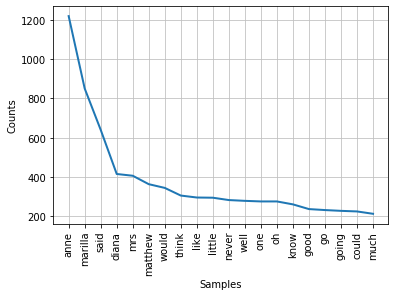

In [15]:
#check word frequency distribution
frequency = nltk.FreqDist(clean_words)

#plot the word frequency distribution
frequency.plot(20)

In [16]:
most_common_word = "Anne"
print("Unsurprisingly, the most common word in the novel was ", most_common_word, "! In fact, names of a few more characters from the novel are high on the list as well.")

Unsurprisingly, the most common word in the novel was  Anne ! In fact, names of a few more characters from the novel are high on the list as well.


To sum up, this *data science pipeline* can be used to visualise the word frequency distributions of any book or any other corpus. However, it could be improved in many ways that would make it more complex and that would use more of what `nltk` and the other packages offer.